# Добрый день!

# Представляю Сборный проект —2 "HR-аналитика компании «Работа с заботой»".

# Описание проекта

HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.

Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён.

# Задача 1

**Построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика.**

Почему бизнесу это важно: удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.

Целевой признак - **`job_satisfaction_rate`  — уровень удовлетворённости сотрудника работой в компании**

Для этой задачи заказчик предоставил данные с признаками:

`id` — уникальный идентификатор сотрудника;

`dept` — отдел, в котором работает сотрудник;

`level` — уровень занимаемой должности;

`workload` — уровень загруженности сотрудника;

`employment_years` — длительность работы в компании (в годах);

`last_year_promo` — показывает, было ли повышение за последний год;

`last_year_violations` — показывает, нарушал ли сотрудник трудовой договор за последний год;

`supervisor_evaluation` — оценка качества работы сотрудника, которую дал руководитель;

`salary` — ежемесячная зарплата сотрудника;

`job_satisfaction_rate` — уровень удовлетворённости сотрудника работой в компании, целевой признак.

# Задача 2

**Построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.**

Для этой задачи вы можете использовать те же входные признаки, что и в предыдущей задаче. Однако целевой признак отличается: это **`quit` — увольнение сотрудника из компании.**

## Загрузка данных Задача 1: предсказание уровня удовлетворённости сотрудника

### Загрузка библиотек

In [ ]:
# импорт библиотек

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import RandomizedSearchCV

#from sklearn.pipeline import Pipeline
#from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import (StandardScaler,
                                   MinMaxScaler,
                                   OneHotEncoder,
                                   OrdinalEncoder,
                                   LabelEncoder)

from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score

# загрузка Phi_K

!pip install phik -q
import phik
from phik.report import plot_correlation_matrix
from phik import report

# загрузка t-test
from scipy import stats as st

### Загрузка файлов с данными

Тренировочная выборка:

**train_job_satisfaction_rate.csv**

Входные признаки тестовой выборки:

**test_features.csv**

Целевой признак тестовой выборки:

**test_target_job_satisfaction_rate.csv**

In [ ]:
# чтение и загрузка файлов - основной датасет, тренировочная выборка с целевым признаком

train_job = pd.read_csv('/datasets/train_job_satisfaction_rate.csv', sep=',', decimal = '.')
display(train_job.head())
train_job.shape

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


(4000, 10)

In [ ]:
# чтение и загрузка файлов - Входные признаки тестовой выборки

test_features = pd.read_csv('/datasets/test_features.csv', sep=',', decimal = '.')
display(test_features.head())
test_features.shape

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


(2000, 9)

In [ ]:
# чтение и загрузка файлов - Целевой признак тестовой выборки

test_target = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv', sep=',', decimal = '.')
display(test_target.head())
test_target.shape

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


(2000, 2)

Так как обучающая и тестовая выборка представлена разными файлами, то будем использовать их по соответсвию.

Для того, чтобы в дальнейшем использовать тестовый файл корректно, то объединим их в один

In [ ]:
# объединяем таблицы

#test_features = test_features.set_index('id')
#test_target = test_target.set_index('id')

test_job = test_features.merge(test_target, on = 'id', how = 'left')
display(test_job.head())

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800,0.79
1,686555,hr,junior,medium,1,no,no,4,30000,0.72
2,467458,sales,middle,low,5,no,no,4,19200,0.64
3,418655,sales,middle,low,6,no,no,4,19200,0.60
4,789145,hr,middle,medium,5,no,no,5,40800,0.75


In [ ]:
test_job.shape

(2000, 10)

**Вывод:** Данные загружены, файлы объеденены.

In [ ]:
for dataframe in [train_job, test_job]:
    print(dataframe.info())
    print('________________________\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB
None
________________________

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------    

##  Предобработка данных

In [ ]:
# проверяем форматы данных

for dataframe in [train_job, test_job]:
    print(dataframe.info())
    print('________________________\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB
None
________________________

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------    

Форматы признаков определены верно

In [ ]:
# проверяем пропуски в 2х таблицах

for dataframe in [train_job, test_job]:
    print(dataframe.isna().sum().sort_values(ascending=False))
    print('________________________\n')

dept                     6
level                    4
id                       0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64
________________________

dept                     2
level                    1
id                       0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64
________________________



В таблицах есть незначительные пропуски. Далее их заполним в пайплайне

In [ ]:
# проверяем на дубликаты

for dataframe in [train_job, test_job]:
    print(dataframe.duplicated().sum())
    print('________________________\n')

0
________________________

0
________________________



Дубликаты отсутствуют.

In [ ]:
# проверка не неявные дубликаты

for column in train_job.columns:
    print("Значения в столбце '", column,"':", train_job[column].unique(), '\n')

Значения в столбце ' id ': [155278 653870 184592 ... 533318 706868 338347] 

Значения в столбце ' dept ': ['sales' 'hr' 'technology' 'purchasing' 'marketing' nan] 

Значения в столбце ' level ': ['junior' 'middle' 'sinior' nan] 

Значения в столбце ' workload ': ['medium' 'high' 'low'] 

Значения в столбце ' employment_years ': [ 2  1  4  7  9  6  3 10  8  5] 

Значения в столбце ' last_year_promo ': ['no' 'yes'] 

Значения в столбце ' last_year_violations ': ['no' 'yes'] 

Значения в столбце ' supervisor_evaluation ': [1 5 2 3 4] 

Значения в столбце ' salary ': [24000 38400 12000 18000 22800 30000 56400 52800 13200 54000 19200 40800
 34800 27600 26400 33600 50400 15600 14400 25200 72000 31200 32400 48000
 43200 46800 58800 84000 44400 39600 37200 21600 28800 62400 60000 42000
 49200 55200 57600 68400 45600 51600 64800 80400 20400 61200 76800 69600
 16800 36000 63600 81600 66000 74400 67200 70800 73200 75600 79200 94800
 78000 88800 92400 85200 91200 98400 96000 97200] 

Значения в ст

In [ ]:
# проверка не неявные дубликаты

for column in test_job.columns:
    print("Значения в столбце '", column,"':", test_job[column].unique(), '\n')

Значения в столбце ' id ': [485046 686555 467458 ... 305653 160233 771859] 

Значения в столбце ' dept ': ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' '] 

Значения в столбце ' level ': ['junior' 'middle' 'sinior' nan] 

Значения в столбце ' workload ': ['medium' 'low' 'high' ' '] 

Значения в столбце ' employment_years ': [ 2  1  5  6  3  9  7  4  8 10] 

Значения в столбце ' last_year_promo ': ['no' 'yes'] 

Значения в столбце ' last_year_violations ': ['no' 'yes'] 

Значения в столбце ' supervisor_evaluation ': [5 4 3 1 2] 

Значения в столбце ' salary ': [28800 30000 19200 40800 42000 26400 49200 62400 14400 36000 33600 44400
 27600 12000 64800 20400 34800 15600 18000 50400 31200 51600 16800 43200
 52800 32400 37200 58800 24000 21600 48000 45600 25200 63600 61200 56400
 38400 46800 55200 13200 39600 54000 57600 68400 22800 72000 81600 60000
 66000 67200 70800 76800 79200 69600 94800 82800 80400 87600 86400 96000
 78000 75600 73200 84000 88800 92400] 

Значения в столбц

В столбцах также присутствуют пропуски "nan" и " " (пустые ячейки с пробелами), заполнение таких пропусков прогоним через пайплайн на 4 шаге.

In [ ]:
train_job.replace(' ', np.nan, inplace = True)
test_job.replace(' ', np.nan, inplace = True)

In [ ]:
# признак supervisor_evaluation переведем в категориальный, так как это не число,
# а оценка руководителя
# train_job['supervisor_evaluation'] = train_job['supervisor_evaluation'].astype(object)
# test_job['supervisor_evaluation'] = test_job['supervisor_evaluation'].astype(object)

## Исследовательский анализ данных

### Стастистический анализ данных

In [ ]:
# для статистического анализа по всем признакам воспользуемся функцией describe
# она доступна только для числовых столбцов

train_job.describe()

,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,544957.621000,3.718500,3.476500,33926.700000,0.533995
std,257883.104622,2.542513,1.008812,14900.703838,0.225327
min,100954.000000,1.000000,1.000000,12000.000000,0.030000
25%,322836.750000,2.000000,3.000000,22800.000000,0.360000
50%,534082.500000,3.000000,4.000000,30000.000000,0.560000
75%,771446.000000,6.000000,4.000000,43200.000000,0.710000
max,999521.000000,10.000000,5.000000,98400.000000,1.000000


In [ ]:
# для статистического анализа по всем признакам воспользуемся функцией describe
# она доступна только для числовых столбцов

test_job.describe()

,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
mean,552765.213500,3.666500,3.526500,34066.800000,0.54878
std,253851.326129,2.537222,0.996892,15398.436729,0.22011
min,100298.000000,1.000000,1.000000,12000.000000,0.03000
25%,339052.000000,1.000000,3.000000,22800.000000,0.38000
50%,550793.000000,3.000000,4.000000,30000.000000,0.58000
75%,765763.750000,6.000000,4.000000,43200.000000,0.72000
max,999029.000000,10.000000,5.000000,96000.000000,1.00000


В целом мы можем отметить, что тренировочная и тестовая выборки не сильно отличаются по расчетным метрикам, это хорошо отразится при предсказании модели на тестовых данных.

### Графики для признаков

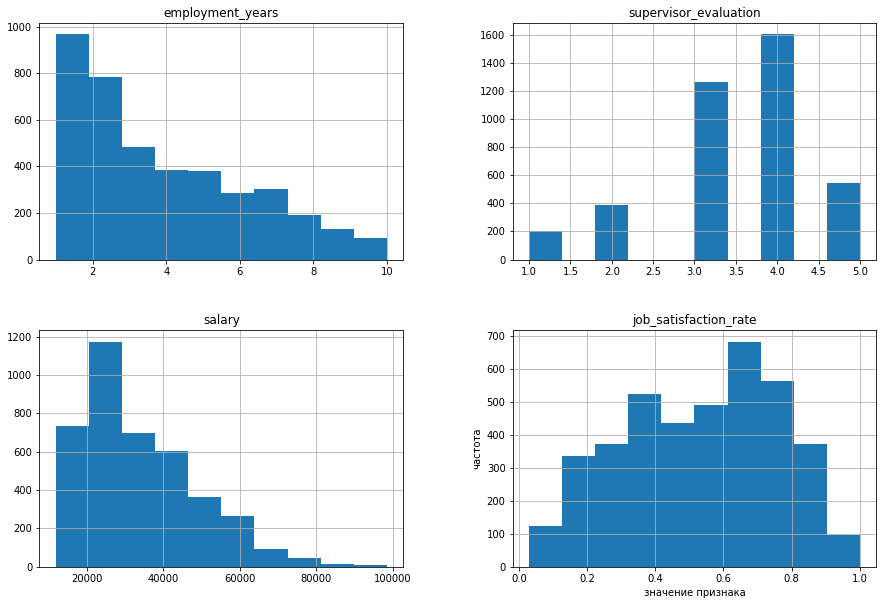

In [ ]:
# построим график для количественных признаков датасета *train_job*

col_train_job = train_job[['employment_years',
                     'supervisor_evaluation',
                     'salary',
                     'job_satisfaction_rate']]
col_train_job.hist(figsize=(15, 10), bins=10)
plt.xlabel('значение признака')
plt.ylabel('частота');

**Вывод:**

1) employment_years (длительность работы в компании (в годах)) - гистограмма имеет хвост справа и судя по этому графику в компании в основном работает "свежий" персонал с длительностью до 2 лет.

2) supervisor_evaluation (оценка качества работы сотрудника, которую дал руководитель) - здесь мы видим четкую балльную систему оценки сотрудников. В основном их руководители оценивают на 3-4 балла

3) salary (ежемесячная зарплата сотрудника) - гистограмма имеет хвост справа и судя по этому графику основная доля сотрудников зарабатывает от 20 до 30 тыс руб в мес. И лишь минимальное количество имеет зарплату от 80 до 10 тыс руб в мес.

4) job_satisfaction_rate ( уровень удовлетворённости сотрудника работой в компании) - гистограмма имеет две вершины, то есть либо сотрудники не удовлетворены (оценка 0,3 - 0,4), либо их все утраивает вцелом (оценка 0,7 - 0,8)

<span style="text-decoration: underline;">Посмотрим как распределены уровни удовлетворённости сотрудника работой в компании по отделам, по должности и по уровню загруженности</span>

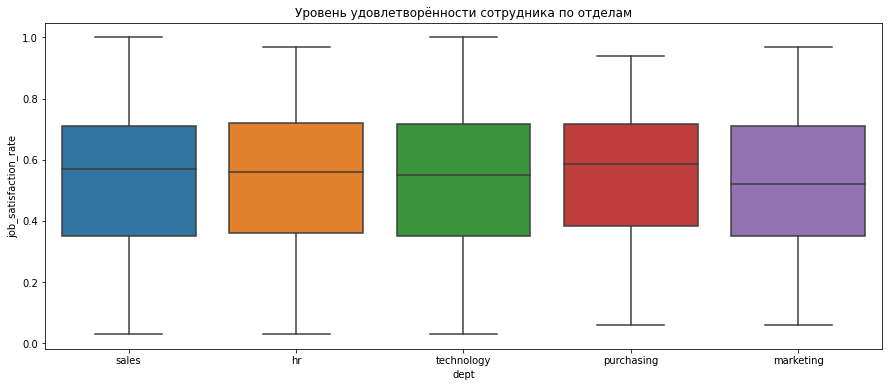

In [ ]:
# построили график "ящик с усами" по отделам

plt.figure(figsize=(15,6))

plt.title('Уровень удовлетворённости сотрудника по отделам')
sns.boxplot(x='dept', y = 'job_satisfaction_rate', data = train_job, dodge=False);

Медиана по удовлетворенности в 4 отделах практически на одном уровне, кроме отдела Маркетинга (там уровень удовлетворенности в среднем ниже).

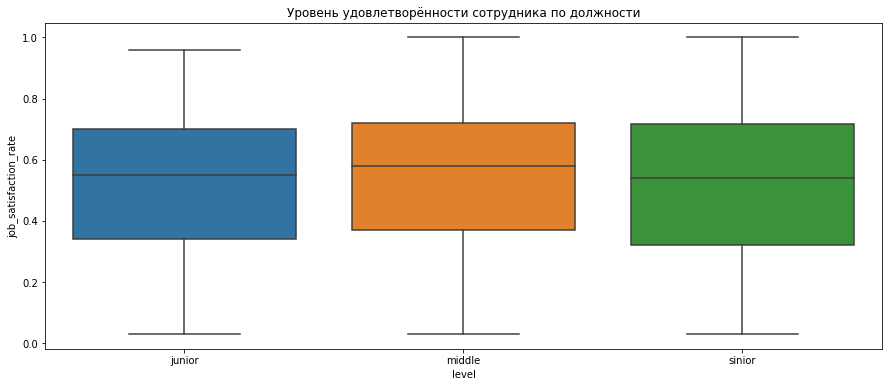

In [ ]:
# построили график "ящик с усами" по уровню занимаемой должности

plt.figure(figsize=(15,6))

plt.title('Уровень удовлетворённости сотрудника по должности')
sns.boxplot(x='level', y = 'job_satisfaction_rate', data = train_job, dodge=False);

Средний уровень удовлетворенности у Middle level выше, чем у начинающего Junior и опытного Sinior

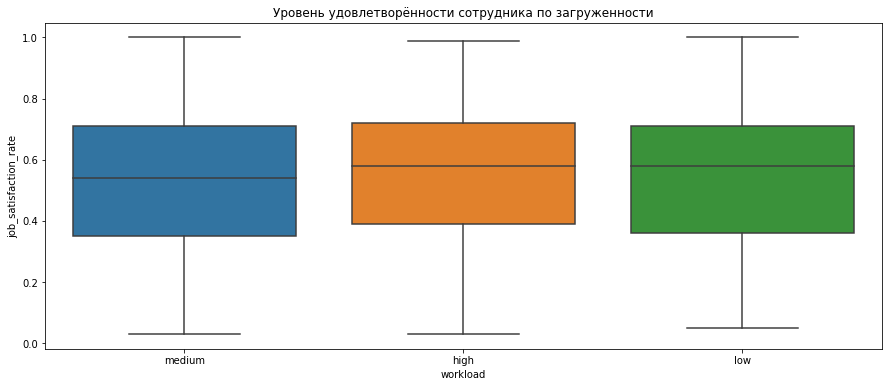

In [ ]:
# построили график "ящик с усами" по уровню загруженности сотрудника

plt.figure(figsize=(15,6))

plt.title('Уровень удовлетворённости сотрудника по загруженности')
sns.boxplot(x='workload', y = 'job_satisfaction_rate', data = train_job, dodge=False);

Средний уровень удовлетворенности у Высокозагруженного и Низкозагруженного одинаковый, а у Среднезагруженного чуть ниже.

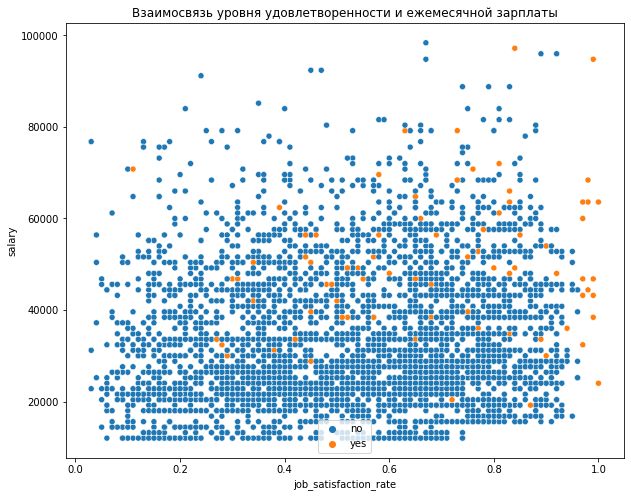

In [ ]:
# посмотрим на диаграмму рассеяния "уровня удовлетворенности и ежемесячной зарплаты"

plt.figure(figsize=(10,8))
sns.scatterplot(data=train_job, x = 'job_satisfaction_rate',y= 'salary', hue='last_year_promo')
plt.legend(title="", loc=8)
plt.title("Взаимосвязь уровня удовлетворенности и ежемесячной зарплаты")
plt.show();

Судя по графику размер заработной платы не коррелирует с уровнем удовлетворенности, но зато есть небольшая корреляция между удовлетворенностью и фактом повышения зарплаты за последний год

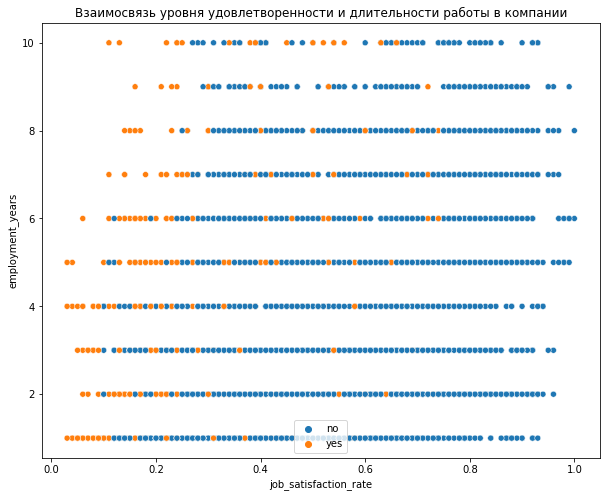

In [ ]:
# посмотрим на диаграмму рассеяния "уровня удовлетворенности и длительность работы в компании"

plt.figure(figsize=(10,8))
sns.scatterplot(data=train_job, x = 'job_satisfaction_rate',y= 'employment_years', hue='last_year_violations')
plt.legend(title="", loc=8)
plt.title("Взаимосвязь уровня удовлетворенности и длительности работы в компании")
plt.show();

Получается, что так как мы смотрим взаимосвязь целевого признака удовлетворенности и времени работы в компании, то связи между ними нет. Зато очевидна взаимосвязь удовлетворенности и факт нарушения трудового договора за год - эти сотрудники имеют очень низкий уровень удовлетворенности.

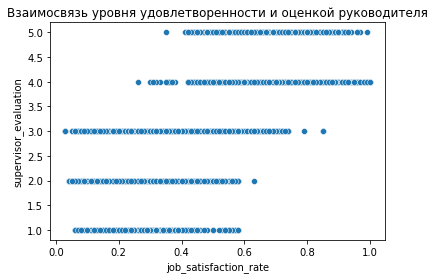

In [ ]:
# посмотрим на диаграмму рассеяния "уровня удовлетворенности и оценкой руководителя"

sns.scatterplot(data=train_job, x = 'job_satisfaction_rate',y= 'supervisor_evaluation')
plt.title("Взаимосвязь уровня удовлетворенности и оценкой руководителя")
plt.show();

**Чем выше оценка руководителя, тем выше удовлетворенность сотрудника**

In [ ]:
# Сводная таблица (количество сотрудников)

pivot_id = train_job.pivot_table(index = 'dept', values = 'id', aggfunc = ['count'])
display(pivot_id)


,count
,id
dept,
hr,456
marketing,550
purchasing,610
sales,1512
technology,866


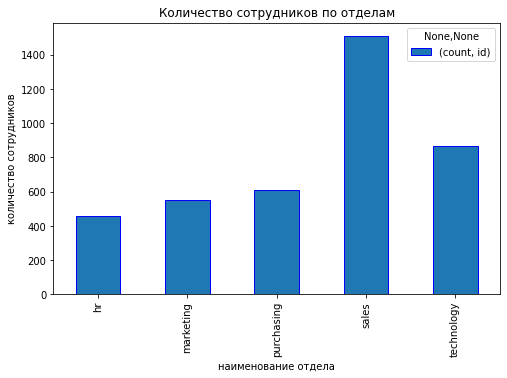

In [ ]:
# График

pivot_id.plot(kind = 'bar', xlabel='dept', ylabel='id', figsize=(8,5), ec='blue')
plt.title('Количество сотрудников по отделам')
plt.xlabel('наименование отдела')
plt.ylabel('количество сотрудников')
plt.show()

Больше всего сотрудников работает в отеле продаж 'Sales'

In [ ]:
# Сводная таблица (количество сотрудников по уровню должности)

pivot_level = train_job.pivot_table(index = 'level', values = 'id', aggfunc = ['count'])
display(pivot_level)


,count
,id
level,
junior,1894
middle,1744
sinior,358


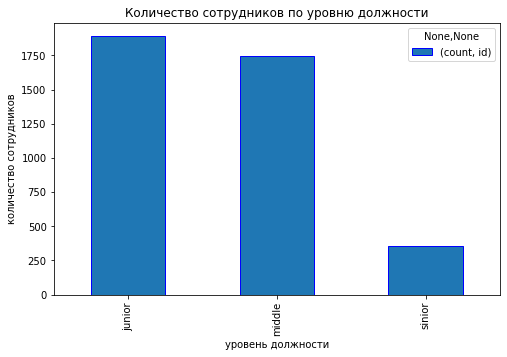

In [ ]:
# График

pivot_level.plot(kind = 'bar', xlabel='level', ylabel='id', figsize=(8,5), ec='blue')
plt.title('Количество сотрудников по уровню должности')
plt.xlabel('уровень должности')
plt.ylabel('количество сотрудников')
plt.show()

Больше всего сотрудников работают с уровнем должности Junior и Middle, а уровень Sinior в 5 раз меньше

### Корреляционный анализ

Для проведения корреляционного анализа используем библиотеку phik для подсчёта корреляции между признаками разных типов данных

In [ ]:
# удалим столбец id клиентов для корректного построения матрицы корреляции

train_job_corr = train_job.drop(columns='id', axis= 1)
display(train_job_corr.head(2))

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,sales,junior,medium,2,no,no,1,24000,0.58
1,hr,junior,high,2,no,no,5,38400,0.76


In [ ]:
# создаём список с наименованиями непрерывных признаков

interval_cols = ['employment_years',
                 'supervisor_evaluation',
                 'salary',
                 'job_satisfaction_rate']

In [ ]:
# вычисление коэффициентов корреляции phi для датафрейма df

phik_overview = train_job_corr.phik_matrix(interval_cols=interval_cols)

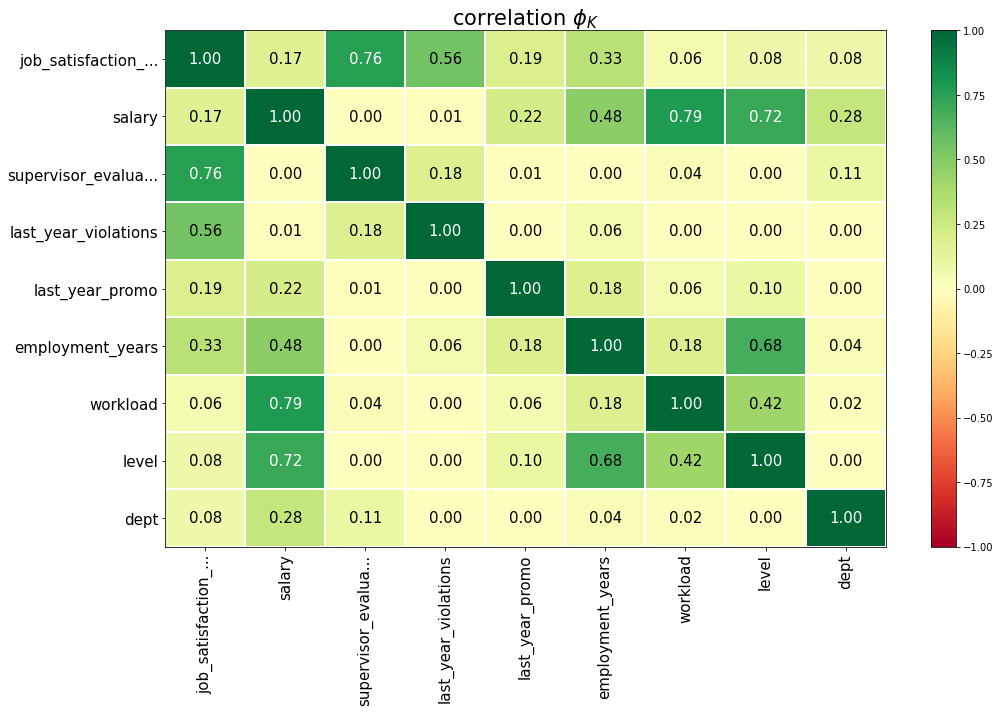

In [ ]:
# визуализация тепловой карты коэффициентов корреляции

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    title=r"correlation $\phi_K$",
    fontsize_factor=1.5,
    figsize=(15, 10))

**Корреляция:**

* Высокая корреляция 0,65 - 0,8 между признаками: удовлетворенность и оценка качества работы от руководителя, зарплата и уровень загруженности сотрудника, зарплата и уровень должности, длительность работы в компании и уровень должности.

* Средняя корреляция 0,4 - 0,6 между признаками: удовлетворенность и факт нарушения трудового договора, зарплата и  длительность работы в компании,  уровень загруженности сотрудника и должность.

**Вывод:**

1) Статистический анализ: тренировочная и тестовая выборки не сильно отличаются по расчетным метрикам, это хорошо отразится при предсказании модели на тестовых данных.

2) Графики:

* Чем выше оценка руководителя, тем выше удовлетворенность сотрудника

* Медиана по удовлетворенности в 4 отделах практически на одном уровне, кроме отдела Маркетинга (там уровень удовлетворенности в среднем ниже).

* Средний уровень удовлетворенности у Middle level выше, чем у начинающего Junior и опытного Sinior

* Средний уровень удовлетворенности у Высокозагруженного и Низкозагруженного одинаковый, а у Среднезагруженного чуть ниже.

* Есть небольшая корреляция между удовлетворенностью и фактом повышения зарплаты за последний год

* Очевидна взаимосвязь удовлетворенности и факт нарушения трудового договора за год - эти сотрудники имеют очень низкий уровень удовлетворенности

* Больше всего сотрудников работает в отеле продаж 'Sales'. Больше всего сотрудников работают с уровнем должности Junior и Middle, а уровень Sinior в 5 раз меньше

3) Проведен корреляционный анализ признаков, выводы оформлены выше.

## Подготовка данных

### Создание пайплайнов

In [ ]:
# зададим константы

RANDOM_STATE = 55
# TEST_SIZE = 0.3

train_job = train_job.set_index('id')
test_job = test_job.set_index('id')

In [ ]:
# определим целевой показатель

X_train = train_job.drop(columns=['job_satisfaction_rate'], axis=1)
y_train = train_job['job_satisfaction_rate']

X_test = test_job.drop(columns=['job_satisfaction_rate'], axis=1)
y_test = test_job['job_satisfaction_rate']

In [ ]:
for base in [X_train, y_train, X_test, y_test]:
    print(base.shape)

(4000, 8)
(4000,)
(2000, 8)
(2000,)


In [ ]:
# сформируем списки для кодирования признаков

# категориальные
ohe_columns = ['last_year_promo',
               'last_year_violations',
               'workload']

# ранговые
ord_columns = ['dept',
               'level']

# количественные
num_columns = ['employment_years',
               'salary',
               'supervisor_evaluation']

In [ ]:
# создаём пайплайн для подготовки признаков из списка ohe_columns
# SimpleImputer + OHE

ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='error', sparse=False))])

NameError: name 'Pipeline' is not defined

In [ ]:
# создаём пайплайн для подготовки признаков из списка ord_columns
# SimpleImputer + ORD + SimpleImputer

ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ord', OrdinalEncoder(categories=[
                    ['sales','hr','technology','purchasing', 'marketing'],
                    ['junior', 'middle', 'sinior'],
#                    ['low','medium', 'high'],
#                    [1, 2, 3, 4, 5]
        ],
                handle_unknown='use_encoded_value', unknown_value=np.nan)),
        ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))])

#

In [ ]:
# подготовка общего пайплайна для подготовки данных
# preprocessor__num = preprocessor_ + _num:
# preprocessor__num — пайплайн, в котором находится шаг масштабирования
# num — шаг масштабирования с методом и списком столбцов
# заодно укажем 'passthrough' — вариант без масштабирования

data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ],
    remainder='passthrough'
)

In [ ]:
# создаём итоговый пайплайн: подготовка данных и модель

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])

In [ ]:
# обучаем модель на тренировочной выборке
# result = pipe_final.fit_transform(train_job.drop(['job_satisfaction_rate'], axis=1))

In [ ]:
#result_df = pd.DataFrame(result)
#result_df

In [ ]:
# result_df.isna().sum().sort_values(ascending=False)

### Функция для расчета метрики SMAPE

Для решения задачи введём новую метрику качества — sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).

In [ ]:
# пишем функцию, согласно формуле из описания проекта

def SMAPE_func(actual, predict):
    return np.mean(np.abs(actual - predict) / ((np.abs(predict) + np.abs(actual)) / 2)) * 100


In [ ]:
# введем критерий оценки через scorer

score = make_scorer(SMAPE_func, greater_is_better=False)

## Обучение моделей

Для работы нам понадобятся модели регрессии, так как целевой признак непрерывное значение.

In [ ]:
param_grid = [
    # словарь для модели DecisionTreeRegressor()
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(1,15),
        'models__min_samples_split': range(1,7),
        'models__max_features': range(1,10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LinearRegression()],
        'models__normalize':[False],
        'models__fit_intercept':[True],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] },

    # словарь для модели RandomForestRegressor()
    {
        'models': [RandomForestRegressor(random_state=RANDOM_STATE)],
        'models__n_estimators': range(1,150),
        'models__max_depth':range(1,7)}
]

Для автоматического подбора гиперпараметров будем использовать инструмент RandomizedSearchCV.

models — инициализированная модель

param_grid — словарь с гиперпараметрами модели

cv — тип кросс-валидации

scoring — метрика, которую используем для выбора лучшего решения

n_jobs=-1 — подключаем к расчёту ядра процессора

In [ ]:
# чтобы найти лучшее решение, перебирать будем и гиперпараметры, и методы подготовки данных

randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=7,
    scoring=score,
    random_state=RANDOM_STATE,
    n_jobs=-1)

NameError: name 'pipe_final' is not defined

In [ ]:
# обучаем на тренировочных данных

randomized_search.fit(X_train, y_train)

Fitting 7 folds for each of 10 candidates, totalling 70 fits
[CV 1/7; 1/10] START models=DecisionTreeRegressor(random_state=55), models__max_depth=3, models__max_features=8, models__min_samples_split=4, preprocessor__num=passthrough
[CV 1/7; 1/10] END models=DecisionTreeRegressor(random_state=55), models__max_depth=3, models__max_features=8, models__min_samples_split=4, preprocessor__num=passthrough; total time=   0.0s
[CV 2/7; 1/10] START models=DecisionTreeRegressor(random_state=55), models__max_depth=3, models__max_features=8, models__min_samples_split=4, preprocessor__num=passthrough
[CV 2/7; 1/10] END models=DecisionTreeRegressor(random_state=55), models__max_depth=3, models__max_features=8, models__min_samples_split=4, preprocessor__num=passthrough; total time=   0.0s
[CV 3/7; 1/10] START models=DecisionTreeRegressor(random_state=55), models__max_depth=3, models__max_features=8, models__min_samples_split=4, preprocessor__num=passthrough
[CV 3/7; 1/10] END models=DecisionTreeRegre

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 7/7; 2/10] END models=DecisionTreeRegressor(random_state=55), models__max_depth=5, models__max_features=2, models__min_samples_split=1, preprocessor__num=StandardScaler(); total time=   0.0s
[CV 1/7; 3/10] START models=DecisionTreeRegressor(random_state=55), models__max_depth=2, models__max_features=8, models__min_samples_split=3, preprocessor__num=MinMaxScaler()
[CV 1/7; 3/10] END models=DecisionTreeRegressor(random_state=55), models__max_depth=2, models__max_features=8, models__min_samples_split=3, preprocessor__num=MinMaxScaler(); total time=   0.0s
[CV 2/7; 3/10] START models=DecisionTreeRegressor(random_state=55), models__max_depth=2, models__max_features=8, models__min_samples_split=3, preprocessor__num=MinMaxScaler()
[CV 2/7; 3/10] END models=DecisionTreeRegressor(random_state=55), models__max_depth=2, models__max_features=8, models__min_samples_split=3, preprocessor__num=MinMaxScaler(); total time=   0.0s
[CV 3/7; 3/10] START models=DecisionTreeRegressor(random_state=55), m

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 5/7; 6/10] END models=DecisionTreeRegressor(random_state=55), models__max_depth=13, models__max_features=3, models__min_samples_split=1, preprocessor__num=MinMaxScaler(); total time=   0.0s
[CV 6/7; 6/10] START models=DecisionTreeRegressor(random_state=55), models__max_depth=13, models__max_features=3, models__min_samples_split=1, preprocessor__num=MinMaxScaler()
[CV 6/7; 6/10] END models=DecisionTreeRegressor(random_state=55), models__max_depth=13, models__max_features=3, models__min_samples_split=1, preprocessor__num=MinMaxScaler(); total time=   0.0s
[CV 7/7; 6/10] START models=DecisionTreeRegressor(random_state=55), models__max_depth=13, models__max_features=3, models__min_samples_split=1, preprocessor__num=MinMaxScaler()
[CV 7/7; 6/10] END models=DecisionTreeRegressor(random_state=55), models__max_depth=13, models__max_features=3, models__min_samples_split=1, preprocessor__num=MinMaxScaler(); total time=   0.0s
[CV 1/7; 7/10] START models=DecisionTreeRegressor(random_state=55)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-22.32395774          nan -23.63005548 -18.48141092 -21.94827184
          nan -15.66185715 -19.44517676 -14.94379183 -27.27421496]
  warnings.warn(


RandomizedSearchCV(cv=7,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              sparse=False))]),
                                                                               ['last_year_promo',
                             

**ВЫБОР ЛУЧШЕЙ МОДЕЛИ**

In [ ]:
# получим все результаты и сделаем из них датафрейм

result = pd.DataFrame(randomized_search.cv_results_)

In [ ]:
# посмотрим результат работы всех моделей

display(result[['rank_test_score', 'param_models', 'mean_test_score','params']].sort_values('rank_test_score'))

,rank_test_score,param_models,mean_test_score,params
8,1,"DecisionTreeRegressor(max_depth=13, max_featur...",-14.943792,"{'preprocessor__num': StandardScaler(), 'model..."
6,2,"DecisionTreeRegressor(max_depth=13, max_featur...",-15.661857,"{'preprocessor__num': 'passthrough', 'models__..."
3,3,"DecisionTreeRegressor(max_depth=13, max_featur...",-18.481411,"{'preprocessor__num': 'passthrough', 'models__..."
7,4,RandomForestRegressor(random_state=55),-19.445177,"{'models__n_estimators': 5, 'models__max_depth..."
4,5,RandomForestRegressor(random_state=55),-21.948272,"{'models__n_estimators': 21, 'models__max_dept..."
0,6,"DecisionTreeRegressor(max_depth=13, max_featur...",-22.323958,"{'preprocessor__num': 'passthrough', 'models__..."
2,7,"DecisionTreeRegressor(max_depth=13, max_featur...",-23.630055,"{'preprocessor__num': MinMaxScaler(), 'models_..."
9,8,"DecisionTreeRegressor(max_depth=13, max_featur...",-27.274215,"{'preprocessor__num': MinMaxScaler(), 'models_..."
1,9,"DecisionTreeRegressor(max_depth=13, max_featur...",NaN,"{'preprocessor__num': StandardScaler(), 'model..."
5,10,"DecisionTreeRegressor(max_depth=13, max_featur...",NaN,"{'preprocessor__num': MinMaxScaler(), 'models_..."


In [ ]:
# выведем лучшие параметры

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на кросс-валидации:', abs(randomized_search.best_score_))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['last_year_promo',
                                                   'last_year_violations',
                                                   'workload']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_befo

In [ ]:
# проверим работу модели на тестовой выборке
# рассчитаем прогноз на тестовых данных

y_test_pred = randomized_search.best_estimator_.predict(X_test)
print(f'Метрика SMAPE на тестовой выборке: {SMAPE_func(y_test, y_test_pred)}')

Метрика SMAPE на тестовой выборке: 14.172091775172172


In [ ]:
for base in [y_test, y_test_pred]:
    print(base.shape)

(2000,)
(2000,)


## Оформление выводов

**Вывод:**

1) Были подготовлены данные:  для этого был переведен "id" в индекс, для train был взят файл целиком train_job, а для тестового файл test_job с выделением целевого признака "job_satisfaction_rate"

2) Были сформированы паплайны для кодирования и масштабирования категориальных и количественных признаков с помощью кодировщиков OneHotEncoder и OrdinalEncoder, и скейлеров MinMaxScaler и StandardScaler

3) Были сформированы справочники моделей с их гиперпараметрами

4) Была создана функция расчета метрики SMAPE, которую в дальнейшем использовали как scoring

5) с помощью RandomizedSearchCV была подобрана лучшая модель и ее гиперпараметры

'models',
                 DecisionTreeRegressor(max_depth=13, max_features=8,
                                       min_samples_split=6, random_state=55))])
Метрика лучшей модели **на кросс-валидации: 14.943791832198034**

Метрика SMAPE на **тестовой выборке: 14.172091775172172**

**К сожалению, при поиске лучшей модели и гиперпараметров не удалось достичь целевого ориентира SMAPE < 15 на тренировочной и тестовой выборке**

<div class="alert alert-info">
    
- Для поиска лучшей модели использовали RandomizedSearchCV уровнями кросс-валидации 7

- Для оценки работы лучшей модели использовали функцию SMAPE (с параметром greater_is_better=False)

- Для кодировщиков использовали разделение признаков по их смысловой сущности. Также было важно для будующей модели, чтобы не множилось количество столбцов и модель смогла компактно отработать.
    
- Для получения целевых значений SMAPE для DecisionTreeRegressor увеличивали глубину до 17, сплиты до 7. А для RandomForestRegressor увеличивали глубину до 7, а количество оценщиков до 150.

Я пробовала переставлять признаки местами и изменять гиперпараметры, но у меня метрика только увеличивалась и не уменьшалась.

## Загрузка данных Задача 2: предсказание увольнения сотрудника из компании

Для этой задачи мы используем те же входные признаки, что и в предыдущей задаче. Однако **целевой** признак отличается: это **quit — увольнение сотрудника из компании**.

Тренировочная выборка:

**train_quit.csv**

Входные признаки тестовой выборки те же, что и в прошлой задаче:

**test_features.csv**

Целевой признак тестовой выборки:

**test_target_quit.csv**

In [ ]:
# чтение и загрузка файлов - основной датасет, тренировочная выборка с целевым признаком

train_quit = pd.read_csv('/datasets/train_quit.csv', sep=',', decimal = '.')
display(train_quit.head())
train_quit.shape

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


(4000, 10)

In [ ]:
# чтение и загрузка файлов - основной датасет, тренировочная выборка с целевым признаком

test_features_quit = pd.read_csv('/datasets/test_features.csv', sep=',', decimal = '.')
display(test_features_quit.head())
test_features_quit.shape

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


(2000, 9)

In [ ]:
# чтение и загрузка файлов - основной датасет, тренировочная выборка с целевым признаком

test_target_quit = pd.read_csv('/datasets/test_target_quit.csv', sep=',', decimal = '.')
display(test_target_quit.head())
test_target_quit.shape

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


(2000, 2)

Для того, чтобы в дальнейшем использовать тестовый файл корректно, то объединим их в один

In [ ]:
# объединяем таблицы

test_quit = test_features_quit.merge(test_target_quit, on = 'id', how = 'left')
display(test_quit.head())

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,485046,marketing,junior,medium,2,no,no,5,28800,no
1,686555,hr,junior,medium,1,no,no,4,30000,no
2,467458,sales,middle,low,5,no,no,4,19200,no
3,418655,sales,middle,low,6,no,no,4,19200,no
4,789145,hr,middle,medium,5,no,no,5,40800,no


In [ ]:
test_quit.shape

(2000, 10)

**Вывод:** Данные загружены, файлы объеденены.

In [ ]:
# проверяем форматы данных

for dataframe in [train_quit, test_quit]:
    print(dataframe.info())
    print('________________________\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB
None
________________________

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 ------------

## Предобработка данных

In [ ]:
# проверяем форматы данных

for dataframe in [train_quit, test_quit]:
    print(dataframe.info())
    print('________________________\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB
None
________________________

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 ------------

Форматы признаков определены верно

In [ ]:
# проверяем пропуски в 2х таблицах

for dataframe in [train_quit, test_quit]:
    print(dataframe.isna().sum().sort_values(ascending=False))
    print('________________________\n')

id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64
________________________

dept                     2
level                    1
id                       0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64
________________________



В таблицах есть незначительные пропуски. Далее их заполним в пайплайне

In [ ]:
# проверяем на дубликаты

for dataframe in [train_quit, test_quit]:
    print(dataframe.duplicated().sum())
    print('________________________\n')

0
________________________

0
________________________



Дубликаты отсутствуют.

In [ ]:
# проверка не неявные дубликаты

for column in train_quit.columns:
    print("Значения в столбце '", column,"':", train_quit[column].unique(), '\n')

Значения в столбце ' id ': [723290 814010 155091 ... 536432 692133 853842] 

Значения в столбце ' dept ': ['sales' 'purchasing' 'marketing' 'technology' 'hr'] 

Значения в столбце ' level ': ['middle' 'junior' 'sinior'] 

Значения в столбце ' workload ': ['high' 'medium' 'low'] 

Значения в столбце ' employment_years ': [ 2  5  1  8  4  7  3  9  6 10] 

Значения в столбце ' last_year_promo ': ['no' 'yes'] 

Значения в столбце ' last_year_violations ': ['no' 'yes'] 

Значения в столбце ' supervisor_evaluation ': [4 1 3 5 2] 

Значения в столбце ' salary ': [54000 27600 37200 24000 25200 18000 44400 19200 45600 57600 33600 16800
 22800 26400 82800 32400 39600 30000 46800 12000 15600 58800 60000 66000
 21600 38400 62400 40800 56400 34800 28800 52800 20400 36000 61200 48000
 43200 73200 31200 78000 64800 72000 94800 96000 63600 79200 55200 42000
 49200 50400 14400 13200 51600 67200 88800 68400 69600 70800 84000 81600
 87600 75600 91200 76800 74400 80400 85200 86400 92400] 

Значения в стол

In [ ]:
# проверка не неявные дубликаты

for column in test_quit.columns:
    print("Значения в столбце '", column,"':", test_quit[column].unique(), '\n')

Значения в столбце ' id ': [485046 686555 467458 ... 305653 160233 771859] 

Значения в столбце ' dept ': ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' '] 

Значения в столбце ' level ': ['junior' 'middle' 'sinior' nan] 

Значения в столбце ' workload ': ['medium' 'low' 'high' ' '] 

Значения в столбце ' employment_years ': [ 2  1  5  6  3  9  7  4  8 10] 

Значения в столбце ' last_year_promo ': ['no' 'yes'] 

Значения в столбце ' last_year_violations ': ['no' 'yes'] 

Значения в столбце ' supervisor_evaluation ': [5 4 3 1 2] 

Значения в столбце ' salary ': [28800 30000 19200 40800 42000 26400 49200 62400 14400 36000 33600 44400
 27600 12000 64800 20400 34800 15600 18000 50400 31200 51600 16800 43200
 52800 32400 37200 58800 24000 21600 48000 45600 25200 63600 61200 56400
 38400 46800 55200 13200 39600 54000 57600 68400 22800 72000 81600 60000
 66000 67200 70800 76800 79200 69600 94800 82800 80400 87600 86400 96000
 78000 75600 73200 84000 88800 92400] 

Значения в столбц

В столбцах также присутствуют пропуски "nan" и " " (пустые ячейки с пробелами), заполнение таких пропусков прогоним через пайплайн на 11 шаге.

In [ ]:
train_quit.replace(' ', np.nan, inplace = True)
test_quit.replace(' ', np.nan, inplace = True)

## Исследовательский анализ данных

### Стастистический анализ данных

In [ ]:
# для статистического анализа по всем признакам воспользуемся функцией describe
# она доступна только для числовых столбцов

train_quit.describe()

,id,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,552099.283750,3.701500,3.474750,33805.800000
std,260158.031387,2.541852,1.004049,15152.415163
min,100222.000000,1.000000,1.000000,12000.000000
25%,327785.750000,2.000000,3.000000,22800.000000
50%,546673.000000,3.000000,4.000000,30000.000000
75%,781497.750000,6.000000,4.000000,43200.000000
max,999915.000000,10.000000,5.000000,96000.000000


In [ ]:
# для статистического анализа по всем признакам воспользуемся функцией describe
# она доступна только для числовых столбцов

test_quit.describe()

,id,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,552765.213500,3.666500,3.526500,34066.800000
std,253851.326129,2.537222,0.996892,15398.436729
min,100298.000000,1.000000,1.000000,12000.000000
25%,339052.000000,1.000000,3.000000,22800.000000
50%,550793.000000,3.000000,4.000000,30000.000000
75%,765763.750000,6.000000,4.000000,43200.000000
max,999029.000000,10.000000,5.000000,96000.000000


В целом мы можем отметить, что тренировочная и тестовая выборки не сильно отличаются по расчетным метрикам, это хорошо отразится при предсказании модели на тестовых данных.

### Графики для признаков

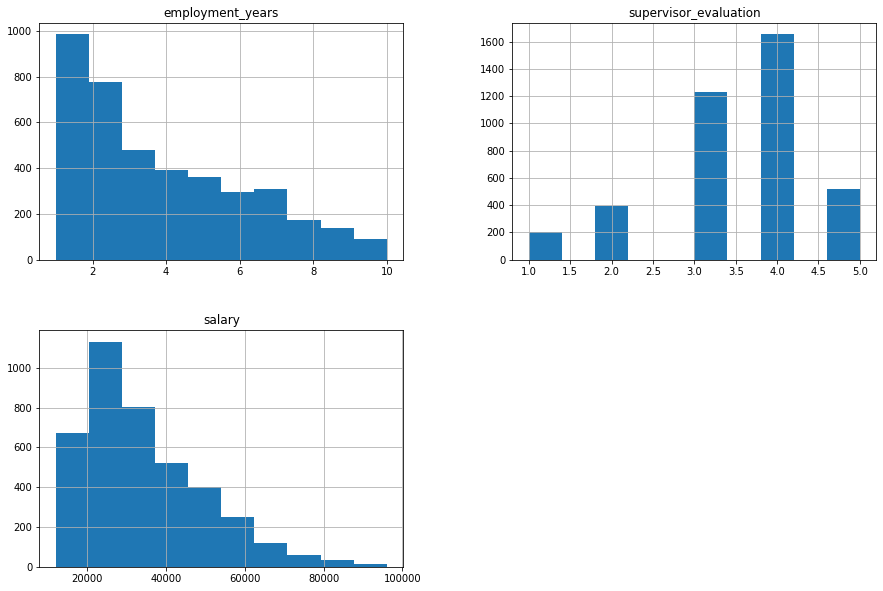

In [ ]:
# построим график для количественных признаков датасета *train_quit*

col_train_quit = train_quit[['employment_years',
                     'supervisor_evaluation',
                     'salary']]
col_train_quit.hist(figsize=(15, 10), bins=10)
plt.xlabel('значение признака')
plt.ylabel('частота');

**Вывод:**

1) employment_years (длительность работы в компании (в годах)) - гистограмма имеет хвост справа и судя по этому графику в компании в основном работает "свежий" персонал с длительностью до 2 лет.

2) supervisor_evaluation (оценка качества работы сотрудника, которую дал руководитель) - здесь мы видим четкую балльную систему оценки сотрудников. В основном их руководители оценивают на 3-4 балла

3) salary (ежемесячная зарплата сотрудника) - гистограмма имеет хвост справа и судя по этому графику основная доля сотрудников зарабатывает от 20 до 30 тыс руб в мес. И лишь минимальное количество имеет зарплату от 80 до 10 тыс руб в мес.


**Составим портрет «уволившегося сотрудника».**

In [ ]:
display(train_quit.head(1))

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no


Посмотрим в каком отделе с большей вероятностью работает уволившийся сотрудник и какой у него уровень загруженности

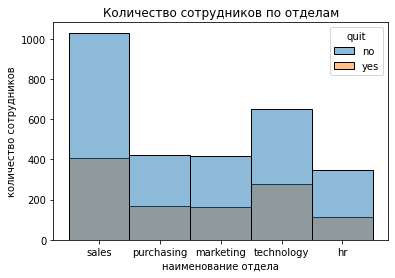

In [ ]:
# График

sns.histplot(data = train_quit, x = 'dept', hue = 'quit', color = 'purple')
plt.title('Количество сотрудников по отделам')
plt.xlabel('наименование отдела')
plt.ylabel('количество сотрудников')
plt.show();

Больше уволившихся сотрудников в отделе Sales и Technology

In [ ]:
# Сводная таблица (количество сотрудников в разрезе отделов и статуса увольнения)

pivot_quit = train_quit.pivot_table(index = 'quit', columns = 'dept', values = 'id', aggfunc = ['count'], margins=True, margins_name='Total')
display(pivot_quit.T)


quit                no   yes  Total
      dept                         
count hr           348   116    464
      marketing    419   163    582
      purchasing   422   166    588
      sales       1031   407   1438
      technology   652   276    928
      Total       2872  1128   4000

In [ ]:
# рассчитаем долю ушедших сотрудников по отделам

print((pivot_quit.T['yes'] / pivot_quit.T['Total'])*100)

       dept      
count  hr            25.000000
       marketing     28.006873
       purchasing    28.231293
       sales         28.303199
       technology    29.741379
       Total         28.200000
dtype: float64


**В целом по штату доля уволившихся сотрудников составляет 28%. Минимальная доля 25% в отделе HR, а максимальная доля 30% - Technology**

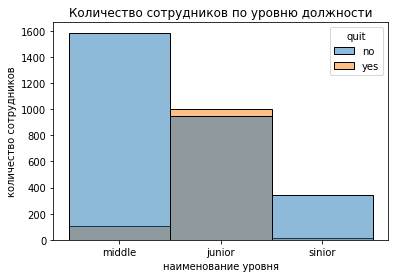

In [ ]:
# График

sns.histplot(data = train_quit, x = 'level', hue = 'quit')
plt.title('Количество сотрудников по уровню должности')
plt.xlabel('наименование уровня')
plt.ylabel('количество сотрудников')
plt.show();

Больше всего увольняются сотрудники, у которых уровень должности Junior.

In [ ]:
# Сводная таблица (количество сотрудников в разрезе уровня должности и статуса увольнения)

pivot_quit2 = train_quit.pivot_table(index = 'quit', columns = 'level', values = 'id', aggfunc = ['count'], margins=True, margins_name='Total')
display(pivot_quit2.T)


quit            no   yes  Total
      level                    
count junior   946  1003   1949
      middle  1586   108   1694
      sinior   340    17    357
      Total   2872  1128   4000

In [ ]:
# рассчитаем долю ушедших сотрудников по уровню должности

print((pivot_quit2.T['yes'] / pivot_quit2.T['Total'])*100)

       level 
count  junior    51.462288
       middle     6.375443
       sinior     4.761905
       Total     28.200000
dtype: float64


**В целом по штату доля уволившихся сотрудников составляет также 28%. Минимальная доля 5% в должности sinior, а максимальная доля 51% - junior**

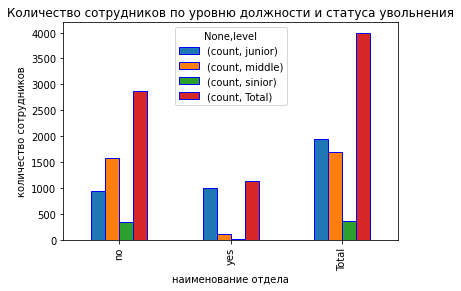

In [ ]:
# График

pivot_quit2.plot(kind = 'bar', xlabel='level',  ec='blue')
plt.title('Количество сотрудников по уровню должности и статуса увольнения')
plt.xlabel('наименование отдела')
plt.ylabel('количество сотрудников')
plt.show()

Стабильно работающих сотрудников больше всего с должностью Middle

In [ ]:
# Сводная таблица (количество сотрудников)
# среднее значение зарплаты ушедших сотрудников с теми, кто остался в компании

pivot_quit3 = train_quit.pivot_table(index = 'quit', values = 'salary', aggfunc = ['mean'],margins=True, margins_name='Total')
display(pivot_quit3)

,mean
,salary
quit,
no,37702.228412
yes,23885.106383
Total,33805.800000


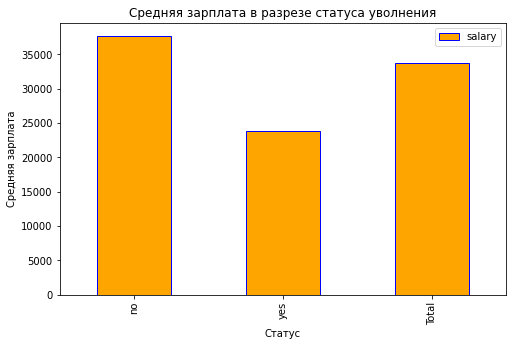

In [ ]:
# График

pivot_quit3['mean'].plot(kind='bar', figsize=(8,5), ec='blue', color = 'orange')
plt.title('Средняя зарплата в разрезе статуса уволнения')
plt.xlabel('Статус')
plt.ylabel('Средняя зарплата')
plt.show();

Средняя зарплата уволившихся сотрудников ниже на 36% тех, кто остался в компании.

### Корреляционный анализ

Для проведения корреляционного анализа используем библиотеку phik для подсчёта корреляции между признаками разных типов данных

In [ ]:
# удалим столбец id клиентов для корректного построения матрицы корреляции

train_quit_corr = train_quit.drop(columns='id', axis= 1)
display(train_quit_corr.head(2))

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,sales,middle,high,2,no,no,4,54000,no
1,sales,junior,medium,2,no,no,4,27600,no


In [ ]:
# создаём список с наименованиями непрерывных признаков

interval_cols2 = ['employment_years',
                 'supervisor_evaluation',
                 'salary']

In [ ]:
# вычисление коэффициентов корреляции phi для датафрейма df

phik_overview2 = train_quit_corr.phik_matrix(interval_cols=interval_cols2)

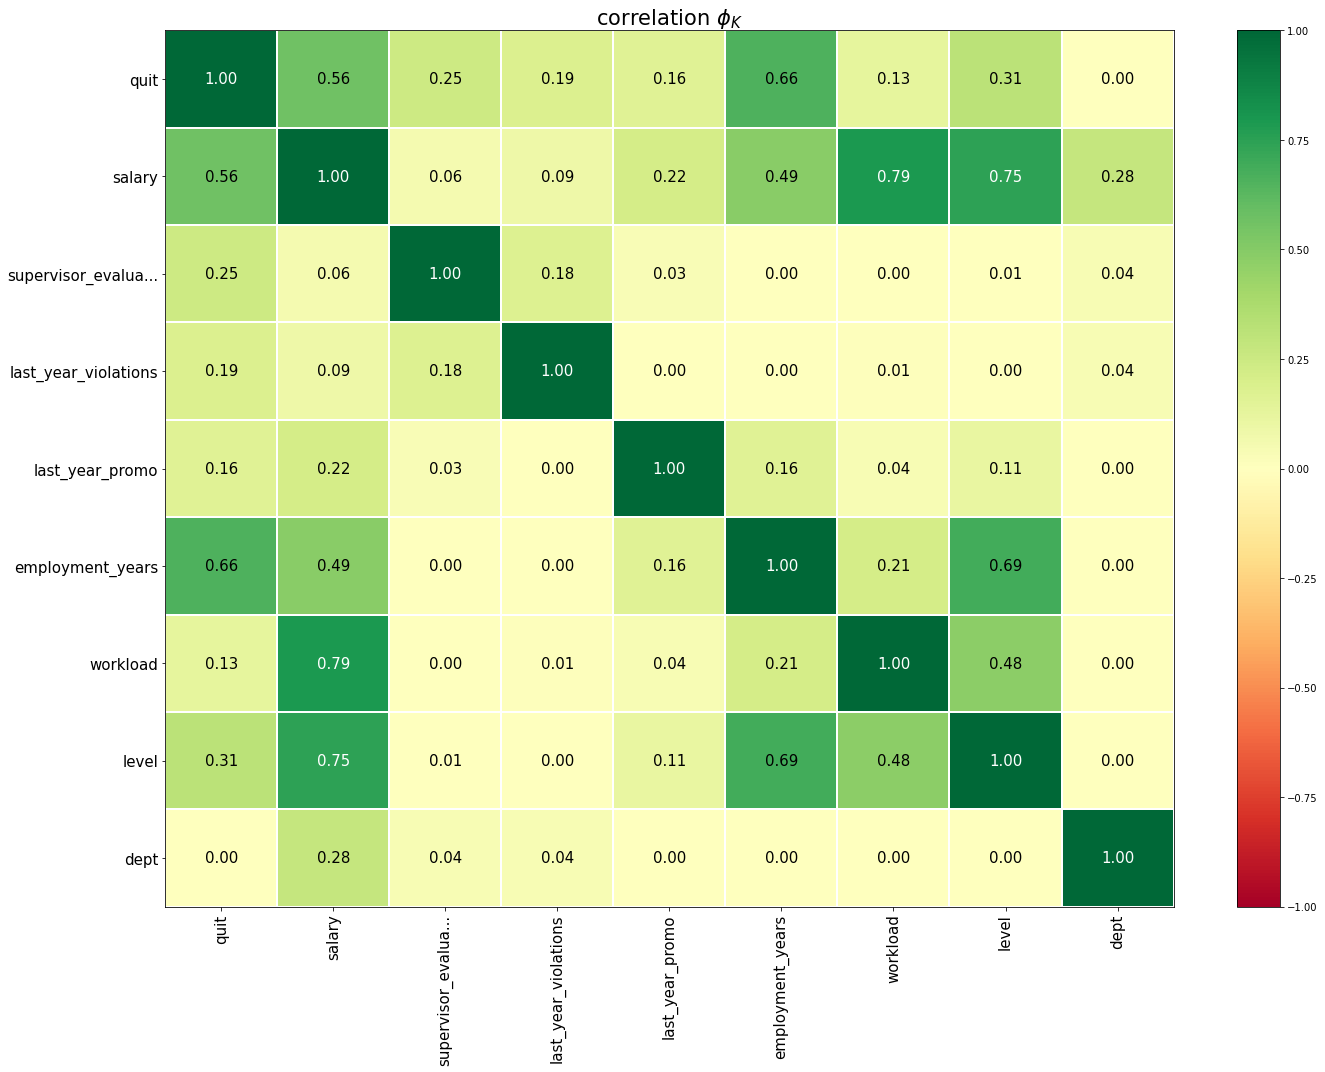

In [ ]:
# визуализация тепловой карты коэффициентов корреляции

plot_correlation_matrix(
    phik_overview2.values,
    x_labels=phik_overview2.columns,
    y_labels=phik_overview2.index,
    title=r"correlation $\phi_K$",
    fontsize_factor=1.5,
    figsize=(20, 15))

**Корреляция:**

* Высокая корреляция 0,65 - 0,8 между признаками: зарплата и уровень загруженности сотрудника, зарплата и уровень должности, длительность работы в компании и статус увольнения.

* Средняя корреляция 0,4 - 0,6 между признаками: статус увольнения и зарплата, зарплата и  длительность работы в компании,  уровень загруженности сотрудника и должность.

**Вывод:**

1) Статистический анализ: тренировочная и тестовая выборки не сильно отличаются по расчетным метрикам, это хорошо отразится при предсказании модели на тестовых данных.

2) Графики и портрет уволившегося сотрудника:

* Больше уволившихся сотрудников в отделе Sales и Technology

* Больше всего увольняются сотрудники, у которых уровень должности Junior.

* Стабильно работающих сотрудников больше всего с должностью Middle

* Средняя зарплата уволившихся сотрудников ниже на 36% тех, кто остался в компании.

3) Проведен корреляционный анализ признаков, выводы оформлены выше.

* Есть небольшая корреляция между статусом увольнения и признаками зарплата / длительность работы в компании

## Добавление нового входного признака

Возможно, уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Проверим это утверждение: визуализируем и сравним распределения признака job_satisfaction_rate для ушедших и оставшихся сотрудников. Используем данные с обоими целевыми признаками тестовой выборки из Задачи 1.

In [ ]:
# объединим 1й целевой признак "job_satisfaction_rate" из тестовой выборки с 2м целевым показателем
# "quit" тоже из тестовой выборки

satis_quit = test_target.merge(test_target_quit, on = 'id', how = 'left')

display(satis_quit.head(2))

,id,job_satisfaction_rate,quit
0,130604,0.74,no
1,825977,0.75,no


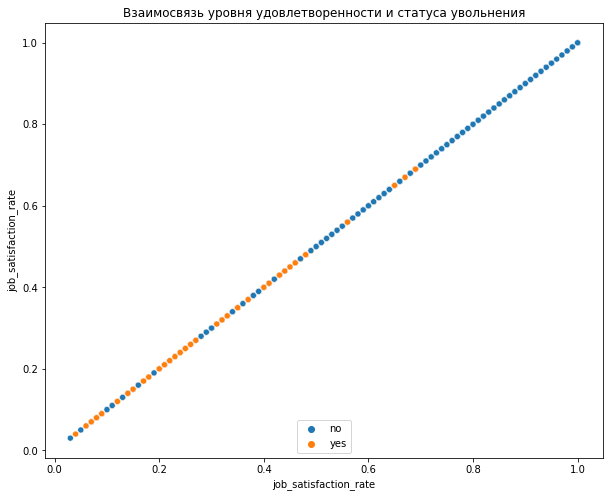

In [ ]:
# проверим зависимость этих показателей друг от друга

plt.figure(figsize=(10,8))
sns.scatterplot(data=satis_quit, x = 'job_satisfaction_rate', y = 'job_satisfaction_rate', hue = 'quit')
plt.legend(title="", loc=8)
plt.title("Взаимосвязь уровня удовлетворенности и статуса увольнения")
plt.show();

#, hue='last_year_promo'

Получается, что если уровень удовлетворенности около 0,5 и выше, то сотрудник реже увольняется. А если этот показатель особенно ниже 0,4, то сотрудник часто увольняется, чем остается.

In [ ]:
interested_value = 0.5 # это уровень удовлетворенности, выше которого сотрудник остается в компании /
                        # если ниже, то увольняется

alpha = 0.05 # уровень статистической значимости
            # можно указать .05 или 0.05

results_t = st.ttest_1samp(
    satis_quit['job_satisfaction_rate'],
    interested_value)

print('p-значение:', results_t.pvalue)

if results_t.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.2286344391718626e-22
Отвергаем нулевую гипотезу


**Добавим job_satisfaction_rate, предсказанный лучшей моделью первой задачи, к входным признакам второй задачи**

In [ ]:
display(y_test_pred)
y_test_pred.shape

array([0.872     , 0.68222222, 0.65714286, ..., 0.24      , 0.554     ,
       0.57      ])

(2000,)

In [ ]:
test_quit['pred_satisfaction'] = y_test_pred
display(test_quit.head())

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,pred_satisfaction
0,485046,marketing,junior,medium,2,no,no,5,28800,no,0.872000
1,686555,hr,junior,medium,1,no,no,4,30000,no,0.682222
2,467458,sales,middle,low,5,no,no,4,19200,no,0.657143
3,418655,sales,middle,low,6,no,no,4,19200,no,0.655000
4,789145,hr,middle,medium,5,no,no,5,40800,no,0.698065


## Подготовка данных

In [ ]:
# зададим константы

# RANDOM_STATE = 55
# TEST_SIZE = 0.3

train_quit = train_quit.set_index('id')
test_quit = test_quit.set_index('id')

In [ ]:
# с помощью функции приведем показатель "quit" к бинарному значению

#def binar_quit(quitly):
#    try:
#        if quitly == "yes":
#            return 1
#        elif quitly == "no":
#            return 0
#    except:
#        pass

In [ ]:
# добавим новый столбец в наш датасет

# train_quit['quitly'] = train_quit['quit'].apply(binar_quit)
# display(train_quit.head(1))

In [ ]:
le = LabelEncoder()
le.fit_transform(train_quit['quit'])
le.transform(test_quit['quit'])

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
# добавим новый столбец в наш датасет

# test_quit['quitly'] = test_quit['quit'].apply(binar_quit)
# display(test_quit.head(1))

In [ ]:
# определим целевой показатель

X_train2 = train_quit.drop(columns=['quit'], axis=1)
y_train2 = train_quit['quit']

X_test2 = test_quit.drop(columns=['quit', 'pred_satisfaction'], axis=1)
y_test2 = test_quit['quit']

In [ ]:
for base in [X_train, y_train, X_test, y_test]:
    print(base.shape)

(4000, 8)
(4000,)
(2000, 8)
(2000,)


## Обучение модели

Справочники для кодировщиков были заданы на предыдущих шагах (п.4.1), поэтому приступим к обучению моделей - нам понадобятся модели классификации, так как наш признак категориальный

In [ ]:
# создаём итоговый пайплайн: подготовка данных и модель

pipe_final2 = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LogisticRegression())
])

In [ ]:
param_grid2 = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(1,6),
        'models__max_features': range(1,6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]
    },

    # словарь для модели KNeighborsClassifier()
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1,10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            solver='saga',
            penalty='l1'
        )],
        'models__C': range(1,5) ,
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]
    }]

In [ ]:
# чтобы найти лучшее решение, перебирать будем и гиперпараметры, и методы подготовки данных.
randomized_search2 = RandomizedSearchCV(
    pipe_final2,
    param_grid2,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1)

In [ ]:
# обучаем на тренировочных данных

randomized_search2.fit(X_train2, y_train2)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              sparse=False))]),
                                                                               ['last_year_promo',
                             

In [ ]:
# получим все результаты и сделаем из них датафрейм

result2 = pd.DataFrame(randomized_search2.cv_results_)

In [ ]:
# посмотрим результат работы всех моделей

display(result2[['rank_test_score', 'param_models', 'mean_test_score','params']].sort_values('rank_test_score'))

,rank_test_score,param_models,mean_test_score,params
7,1,KNeighborsClassifier(n_neighbors=8),0.922840,"{'preprocessor__num': StandardScaler(), 'model..."
8,2,KNeighborsClassifier(n_neighbors=8),0.909570,"{'preprocessor__num': MinMaxScaler(), 'models_..."
1,3,DecisionTreeClassifier(random_state=55),0.834096,"{'preprocessor__num': MinMaxScaler(), 'models_..."
9,4,DecisionTreeClassifier(random_state=55),0.819059,"{'preprocessor__num': MinMaxScaler(), 'models_..."
2,5,DecisionTreeClassifier(random_state=55),0.804221,"{'preprocessor__num': StandardScaler(), 'model..."
0,6,DecisionTreeClassifier(random_state=55),0.792455,"{'preprocessor__num': MinMaxScaler(), 'models_..."
6,7,DecisionTreeClassifier(random_state=55),0.747060,"{'preprocessor__num': MinMaxScaler(), 'models_..."
3,8,DecisionTreeClassifier(random_state=55),0.716057,"{'preprocessor__num': StandardScaler(), 'model..."
4,9,DecisionTreeClassifier(random_state=55),0.664875,"{'preprocessor__num': StandardScaler(), 'model..."
5,9,DecisionTreeClassifier(random_state=55),0.664875,"{'preprocessor__num': MinMaxScaler(), 'models_..."


In [ ]:
# выведем лучшие параметры

print('Лучшая модель и её параметры:\n\n', randomized_search2.best_estimator_)
print ('Метрика лучшей модели на кросс-валидации:', randomized_search2.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['last_year_promo',
                                                   'last_year_violations',
                                                   'workload']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_befo

In [ ]:
probabilities = randomized_search2.predict_proba(X_test2)
probabilities_one = probabilities[:, 1]
print('Метрика ROC-кривой на тестовой выборке:', roc_auc_score(y_test2, probabilities_one))

Метрика ROC-кривой на тестовой выборке: 0.9110524210276774


**Вывод:**

1) Для задачи 2 использовали уже готовый пайплайн с кодировщиками

2) Для обучения моделей вбырали 3: DecisionTreeClassifier, KNeighborsClassifier и LogisticRegression

3) Лучшей моделью себя показала KNeighborsClassifier(n_neighbors=8)

Метрика лучшей модели на кросс-валидации: 0.9228404890054946

Метрика ROC-кривой на тестовой выборке: 0.9110524210276774

**Критерий успеха: ROC-AUC ≥0.91≥0.91 на тестовой выборке выполнен!**

## Общий вывод

# Задача

<span style="text-decoration: underline;">Перед нами стояли две основные задачи, которые требовалось решить с помощью моделей машинного обучения:</span>

1. Построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика.

2. Построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

# Этапы работы

* Загружены данные, которые были предоставлены заказчиком в виде тренировочной выборки на 4000 строк и тестовой выборки на 2000 строк

* Проведена предобработка данных: проверка форматов данных, проверка дубликатов, замена пустых пробелов на nan

* Проведен исследовательский анализ данных: статистический анализ, корреляционный анализ, визуализация зависимостей признаков между собой

* Проведена подготовка данных: составление пайплайна для кодировщиков признаков, составление пайплайна для обучения моделей

* Обучение моделей разными способами: для непрерывного признака использовали модели регрессии, а для категориального модели классификации

* Выбрана лучшая модель для двух задач, соотвественно каждому своя

# Дополнительные предложения для бизнеса

**Для повышения удовлетворенности работы сотрудников и снижения количества увольнений стоит:**

-- продолжать проводить оценку сотрудников руководителем: работать над качеством повышения этой оценки и отдельно прорабатывать группу сотрудников, по которым низкая оценка

-- возможно стоит пересмотреть уровень зарплаты, особенно тех, кто давно работает, потому что чем дольше человек будет работать, тем выше будет становиться его удовлетворенность

-- стоит проводить ротацию кадров между уровнями должностей